**Title: Rain Prediction Model**

**Description**: This model forecast rainfall using variety of input variables such as temperature, humidity, wind speed, cloud cover and atmospheric pressure.

**Steps involved in Model:**

**Step 1:** Importing the required libraries and dataset

**Step 2:** Data cleaning - checking for missing values of any of the input of output parameters

**Step 3:** Selecting the feauters using different methodologies - check for impacting and non-impacting feature, droping the least impactful

**Step 4:** Training the model

**Step 5:** Testing the model

**Step 6:** Finding accuracy and confusion matrix of different models



---



**Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

**Importing Dataset**

In [3]:
url = "https://raw.githubusercontent.com/shravyapendyala/CCE_Assignment_1/refs/heads/main/weather_forecast_data.csv" # dataset link
dataset=pd.read_csv(url)
#data=pd.read_csv(url)
dataset.head(10)


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


**Data Cleaning**

In [4]:
# Check for Missing Values of Parameters in dataset
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())

# Label Encoding on Rain Column
label_encoder=preprocessing.LabelEncoder()
dataset['Rain']=label_encoder.fit_transform(dataset['Rain']) # Converting Rain Column to integer value
dataset.head(5)


Missing Values in Each Column:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


**Feature Selection using Correlation matrix**

<Axes: >

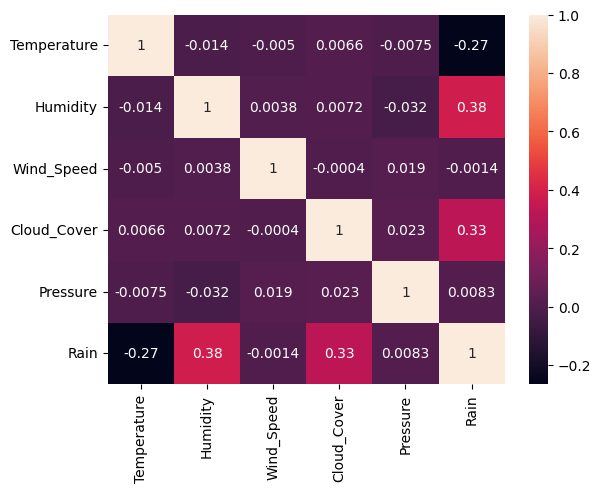

In [5]:
# Correlation Matrix
correl_mat=dataset.corr()

# Plot heat map
sb.heatmap(correl_mat,annot=True)

**Feature Selection using Extra Tree Classifier**

Text(0.5, 1.0, 'Feature Importance')

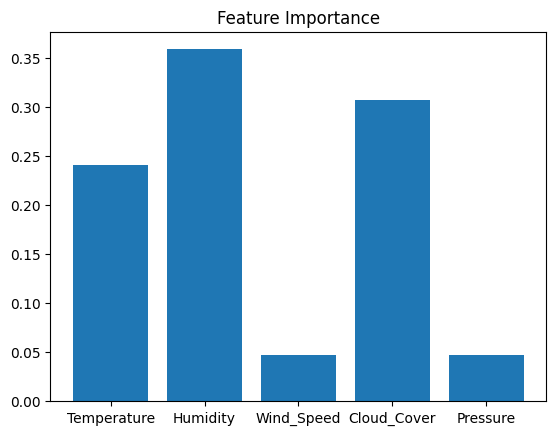

In [6]:
x=dataset.iloc[:, 0:5]
y=dataset.iloc[:, -1]

model=ExtraTreesClassifier()
model.fit(x,y)
imp=pd.Series(model.feature_importances_)
feature_importance = model.feature_importances_
plt.bar(x.columns, feature_importance)
plt.title('Feature Importance')

**Feature Selection using Random Forest**

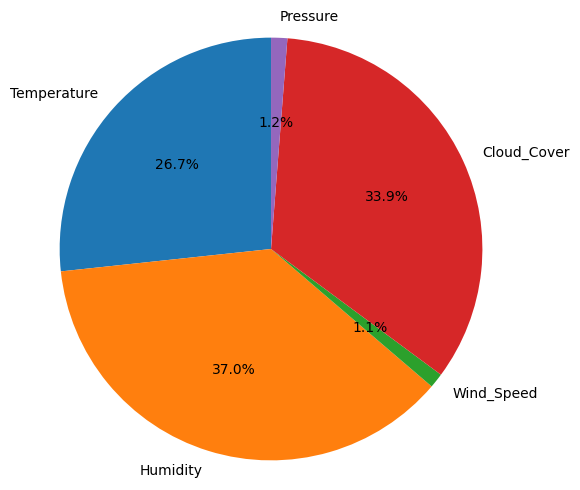

In [7]:
x=dataset.iloc[:, 0:5]
y=dataset.iloc[:, -1]

rf_model = RandomForestClassifier()
rf_model.fit(x,y)
important_features = rf_model.feature_importances_

plt.figure(figsize=(6, 6))
plt.pie(important_features, labels=x.columns, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

**Dimentionality reduction by removing Wind_speed column**

In [8]:
dataset.columns
new_dataset=dataset.drop(columns=['Wind_Speed'])

**Model Training & Testing**

**Splitting data into Training and Testing sets**

In [9]:
from sklearn.model_selection import train_test_split

# Defining new dataset after dropping one feature
X=new_dataset.iloc[:, 0:4]
Y=new_dataset.iloc[:, -1]

# Splitting data into testing and training, testing 30 % & training 70 %
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

y_test=label_encoder.inverse_transform(y_test)

**Training & Testing the model using Random Forest Classifier**

Accuracy of the RF model: 0.9933


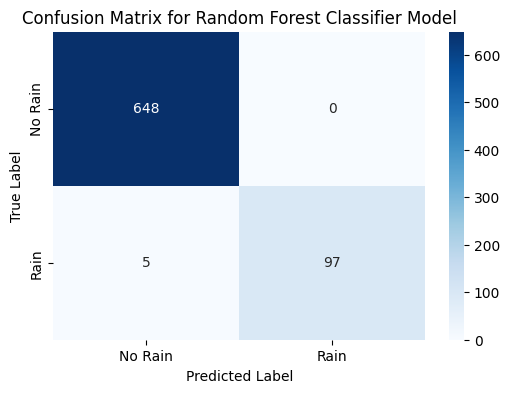

In [11]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# Initialize the RF classifier (Logistic Regression)
classifier1=RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
classifier1.fit(x_train,y_train)

# Making prediction on the test set
y_pred1=classifier1.predict(x_test)

# Inversing the label encoding done to convert rain column to interger values
y_pred1=label_encoder.inverse_transform(y_pred1)
#y_test=label_encoder.inverse_transform(y_test)

# Reshape the predictions and the actual labels (if needed, depending on how you want to compare them)
y_pred1=y_pred1.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_dataframe1=np.concatenate((y_pred1,y_test),axis=1)


# Accuracy of the model
accuracy = accuracy_score(y_pred1,y_test)
print(f"Accuracy of the RF model: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.show()

**Training & Testing the model using Logistic Regression**

Accuracy of the LR model: 0.9267


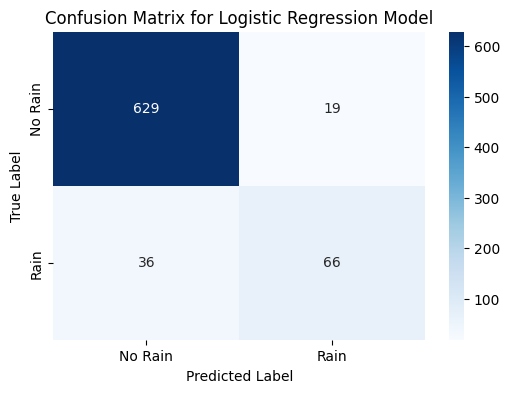

In [12]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# Initialize the LR classifier (Logistic Regression)
classifier2=LogisticRegression( random_state=0)

# Train the model on the training data
classifier2.fit(x_train,y_train)

# Making prediction on the test set
y_pred2=classifier2.predict(x_test)

# Inversing the label encoding done to convert rain column to interger values
y_pred2=label_encoder.inverse_transform(y_pred2)
#y_test=label_encoder.inverse_transform(y_test)

# Reshape the predictions and the actual labels (if needed, depending on how you want to compare them)
y_pred2=y_pred2.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_dataframe2=np.concatenate((y_pred2,y_test),axis=1)

# Accuracy of the model
accuracy = accuracy_score(y_pred2,y_test)
print(f"Accuracy of the LR model: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

**Training & Testing the Model using SVM**

Accuracy of the SVM model: 0.8640


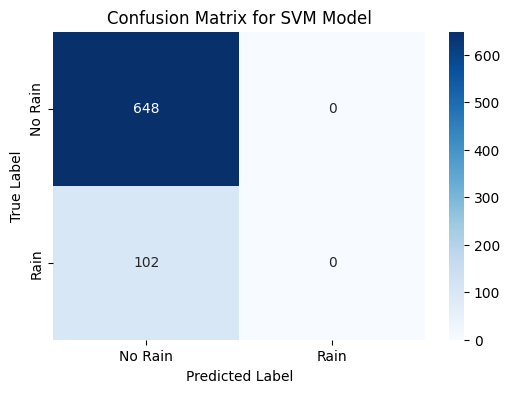

In [13]:
# Initialize the SVM classifier (Support Vector Classifier)
classifier3 = SVC(random_state=0)

# Train the model on the training data
classifier3.fit(x_train, y_train)

# You can now make predictions on the test set
y_pred3 = classifier3.predict(x_test)

# Inversing the label encoding done to convert rain column to interger values
y_pred3=label_encoder.inverse_transform(y_pred3)
#y_test=label_encoder.inverse_transform(y_test)

# Reshape the predictions and the actual labels (if needed, depending on how you want to compare them)
y_pred3=y_pred3.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy of the SVM model: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.show()

**Training & Testing the Model using XGBoost**

In [16]:
import xgboost as xgb

# Initialize the XGBoost classifier
classifier4 = xgb.XGBClassifier(random_state=0)

# Train the model on the training data
classifier4.fit(x_train, y_train)

# You can now make predictions on the test set
y_pred4 = classifier4.predict(x_test)

# # Inversing the label encoding done to convert rain column to interger values
y_pred4 = label_encoder.inverse_transform(y_pred4)
#y_test=label_encoder.inverse_transform(y_test)

# Reshape the predictions and the actual labels (if needed, depending on how you want to compare them)
y_pred4 = y_pred4.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


ModuleNotFoundError: No module named 'xgboost'



------------------------







**Complete Code**


 Data Overview

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain

Missing Values in Each Column:

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

Converted dataset 

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     1
1    27.879734  46.489704    5.952484     4.990053   992.614190     0
2    25.069084  83.072843    1.371992    14.855784  1007.231620     0
3    23.622080  74.367758    7.050551    67.255282   982.632013     1
4    20.591370  96.858822 

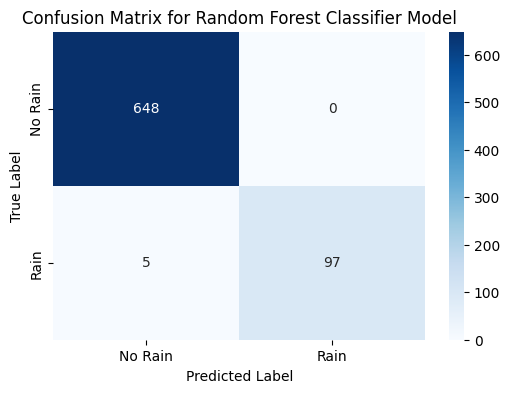

In [17]:
# Dataset Location
url = "https://raw.githubusercontent.com/shravyapendyala/CCE_Assignment_1/refs/heads/main/weather_forecast_data.csv"

# Reading Dataset
dataset=pd.read_csv(url)

# Dataset Overview
print("\n Data Overview\n")
print(dataset.head(5))

# Check for Missing Values of Parameters in dataset
print("\nMissing Values in Each Column:\n")
print(dataset.isnull().sum())

# Label Encoding on Rain Column
label_encoder=preprocessing.LabelEncoder()
dataset['Rain']=label_encoder.fit_transform(dataset['Rain']) # Converting Rain Column to integer value

print("\nConverted dataset \n")
print(dataset.head(5))

from sklearn.model_selection import train_test_split

dataset.columns
new_dataset=dataset.drop(columns=['Wind_Speed'])

print("\n Improved dataset \n" )
print(new_dataset.head(5))
# Defining new dataset after dropping one feature
X=new_dataset.iloc[:, 0:4]
Y=new_dataset.iloc[:, -1]

# Splitting data into testing and training, testing 30 % & training 70 %
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestClassifier
# Initialize the RF classifier (Logistic Regression)
classifier=RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
classifier.fit(x_train,y_train)

# Making prediction on the test set
y_pred=classifier.predict(x_test)

# Inversing the label encoding done to convert rain column to interger values
y_pred=label_encoder.inverse_transform(y_pred)
y_test=label_encoder.inverse_transform(y_test)

# Reshape the predictions and the actual labels (if needed, depending on how you want to compare them)
y_pred=y_pred1.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_dataframe1=np.concatenate((y_pred,y_test),axis=1)


# Accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print(f"\n Accuracy of the RF model: {accuracy:.4f}\n")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.show()